In [1]:
%pylab inline
import os, sys
sys.path.append("../")
import traml
import db
from scipy.optimize import minimize
import copy
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
PAZO = 500603
PMMA = 500201
sio2 = 111401
mgf2 = 105404
a = traml.Stack()

In [3]:
def fun(x, stack, layers, c, delta, TR):
    for i in layers:
        stack.d(i, x[i-1])

    for p in x:
        p = np.sqrt(x[0]**2)
    x[0]=np.sqrt(x[0]**2)
    #min = 1-stack.average(TR, c, delta, o='a')
    min = stack.average(TR, c, delta)
   
    return min**10

In [4]:
def minTR(stack, film_range, c, delta, TR='T'):
    
    x = []
    layers = []
    bnds = []
    for i in range(film_range[0],film_range[1]+1):
        x.append(stack.config[i][1])
        layers.append(i)
        bnds.append(stack.config[i][3])
        
    result = minimize(fun, x, args=(stack, layers, c,delta, TR), bounds = bnds,tol=1e-30, method='SLSQP')
    
    
    return result

In [5]:
c = traml.Stack()
c.set_range([0.4, 0.8])

peak = 0.65
delta = 0.01
stack_list = []
R=[]
n=[]

N = 50
timer=[]

for i in range(0, N):
    start = time.clock()
    #if i % 2 == 0:
       # print 'even', i
        #c.add(PMMA,100, bnds=(50,250))
    # else:
        #c.add(PAZO,100, bnds=(50,250))
    
    c.add(mgf2, 100, bnds=(0,250))
    c.add(sio2, 100, bnds=(0,250))
    
    
    result = minTR(c, [1,len(c.config)-1], peak, delta, TR='T')
    R.append(c.average('R',peak,delta))
    n.append(i+1)
    
    stack_list.append(copy.deepcopy(c))
  
    print '============================================================================================'
   
    print i+1, ': ', 'R = ', c.average('R',peak,delta)
    end = time.clock()
    duration = end-start
    timer.append(duration)
 
    

1 :  R =  0.0819346519793
2 :  R =  0.0887154905194
3 :  R =  0.108895943138
4 :  R =  0.131911914095
5 :  R =  0.140978369312
6 :  R =  0.166989720231
7 :  R =  0.194948460914
8 :  R =  0.224185043451
9 :  R =  0.233918705196
10 :  R =  0.265021130888
11 :  R =  0.291638300601
12 :  R =  0.324577835514
13 :  R =  0.3347540344
14 :  R =  0.35676615312
15 :  R =  0.394966043069
16 :  R =  0.417830496597
17 :  R =  0.45031456487
18 :  R =  0.47544878924
19 :  R =  0.503834047652
20 :  R =  0.529796712992
21 :  R =  0.552905481323
22 :  R =  0.575608876645
23 :  R =  0.59720899859
24 :  R =  0.621357467425
25 :  R =  0.646507190431
26 :  R =  0.664180746518
27 :  R =  0.684274073313
28 :  R =  0.703600127329
29 :  R =  0.720202832911
30 :  R =  0.736680053272
31 :  R =  0.75463655088
32 :  R =  0.770046654491
33 :  R =  0.781909573322
34 :  R =  0.791706111339
35 :  R =  0.798552890513
36 :  R =  0.814743261007
37 :  R =  0.830896717037
38 :  R =  0.842536934111
39 :  R =  0.85028538218
4

In [40]:
s = []
for item in timer:
    s.append(2*pi*(item/2)**2/5)

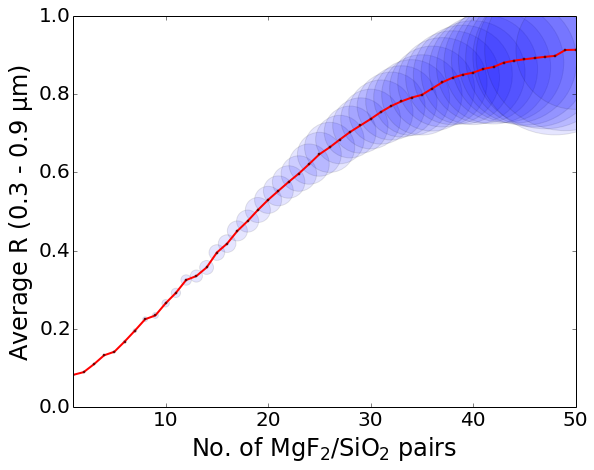

In [56]:
fig = figure(figsize=(9,7))
ax = fig.add_subplot(111)
R = []

for stack in stack_list:
    R.append(stack.average('R',0.65,0.01))
    
    
ax.scatter(n, R, s=s, alpha = 0.1)
ax.set_xlim([1,50])
ax.set_ylim([0,1])
ax.plot(n, R, 'o-', linewidth=2, color='red', markersize=2)
ax.tick_params(labelsize = 20)
ax.set_ylabel('Average R (0.3 - 0.9 $\mu$m)', fontsize=24)
ax.set_xlabel('No. of MgF$_{2}$/SiO$_{2}$ pairs', fontsize=24)




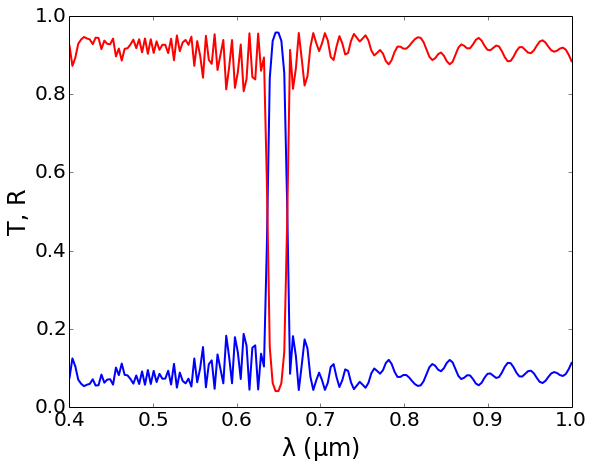

In [59]:
fig = figure(figsize=(9,7))
ax = fig.add_subplot(111)
R = c.get_R()
T = c.get_T()
x = c.x


ax.set_xlim([0.4, 1.0])
ax.set_ylim([0,1])
ax.plot(x, R, '-', linewidth=2, color='blue')
ax.plot(x, T, '-', linewidth=2, color='red')
ax.tick_params(labelsize = 20)
ax.set_ylabel('T, R', fontsize=24)
ax.set_xlabel('$\lambda$ ($\mu$m)', fontsize=24)


In [64]:
avT = c.average('T', 0.5, 0.1) + c.average('T', 0.85, 1.5)
avT/2

0.90066070046556668

In [45]:
c.table()

|   # |     ID | Material   | Thickness (nm)   | Type      |
|-----+--------+------------+------------------+-----------|
|   0 | 301005 | soda-lime  | --               | substrate |
|   1 | 105404 | MgF2       | 46.4169509615    | passive   |
|   2 | 111401 | SiO2       | 249.98172881     | passive   |
|   3 | 105404 | MgF2       | 158.719671308    | passive   |
|   4 | 111401 | SiO2       | 111.361436004    | passive   |
|   5 | 105404 | MgF2       | 117.037062162    | passive   |
|   6 | 111401 | SiO2       | 111.775209526    | passive   |
|   7 | 105404 | MgF2       | 162.527221657    | passive   |
|   8 | 111401 | SiO2       | 248.903321456    | passive   |
|   9 | 105404 | MgF2       | 159.714006623    | passive   |
|  10 | 111401 | SiO2       | 111.565314538    | passive   |
|  11 | 105404 | MgF2       | 117.122114733    | passive   |
|  12 | 111401 | SiO2       | 111.684730064    | passive   |
|  13 | 105404 | MgF2       | 117.284679773    | passive   |
|  14 | 111401 | SiO2   